# Homework 3

<h3> Name : Aishwarya Donegiri </h3>
<h3> USC ID: 4640782493 </h3>

In [1]:
import os
import pandas as pd
import numpy as np

# 1. Time Series Classification

# (a) Downloading the dataset

In [2]:
activities=os.listdir("../data")
columns=['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
activities

['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']

<h2>Data Cleaning</h2> 

df=pd.read_csv("../data/bending2/dataset4.csv",skiprows=5,delim_whitespace=True,names=columns)
df.to_csv(path_or_buf="../data/bending2/dataset4.csv",index=False)

In [3]:
pd.read_csv("../data/bending2/dataset4.csv",skiprows=5,names=columns)

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,32.50,0.50,0.00,0.00,19.00,1.00
1,250,32.50,0.50,0.00,0.00,18.50,0.50
2,500,32.75,0.43,1.00,0.00,18.00,0.00
3,750,32.50,0.50,0.00,0.00,17.50,0.50
4,1000,32.50,0.50,7.50,0.50,17.50,0.87
...,...,...,...,...,...,...,...
475,118750,28.67,0.47,4.67,1.25,17.33,0.47
476,119000,27.50,0.50,5.50,2.50,17.25,1.30
477,119250,28.00,0.00,6.67,0.94,17.00,1.00
478,119500,28.00,0.00,5.00,0.82,17.00,0.71


<h3>Checking for irregularities in data </h3>

In [4]:
activities=os.listdir("../data")
for activity in activities:
    datasets=os.listdir("../data/"+activity)
    for dataset in datasets:
        try:
            pd.read_csv("../data/"+activity+"/"+dataset,skiprows=5)
        except:
            print (activity,dataset) 

Dataset 14 and Dataset 9 in Cycling have irregularities

<h3>Checking for missing</h3>

In [5]:
all_datasets=[]
activities=os.listdir("../data")
for activity in activities:
    datasets=os.listdir("../data/"+activity)
    for dataset in datasets:
        try:
            data=pd.read_csv("../data/"+activity+"/"+dataset,skiprows=5,names=columns)
            all_datasets.append(data)
            if data.shape!=(480,7):
                raise
        except:
            print ("Missing row in :",activity,dataset) 
df=pd.concat(all_datasets)
print ("\nDataset :\n",df)


Dataset :
        time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0         0      39.25       0.43      22.75       0.43      33.75       1.30
1       250      39.25       0.43      23.00       0.00      33.00       0.00
2       500      39.25       0.43      23.25       0.43      33.00       0.00
3       750      39.50       0.50      23.00       0.71      33.00       0.00
4      1000      39.50       0.50      24.00       0.00      33.00       0.00
..      ...        ...        ...        ...        ...        ...        ...
475  118750      31.50       1.66      12.50       3.20      14.25       4.44
476  119000      27.33       1.25      11.33       0.94      20.00       4.00
477  119250      37.80       7.68      14.20       2.48      17.25       0.83
478  119500      33.75       1.30      15.75       5.21      16.50       2.69
479  119750      32.67       3.09      18.67       0.47      14.00       3.16

[42240 rows x 7 columns]


There is a missing row in dataset8.csv of sitting

<h3>Finding the missing row</h3

In [6]:
d=pd.read_csv("../data/sitting/dataset8.csv",skiprows=5,names=columns)
count=0
for i in d['time']:
    if i!=count:
        print ("Missing time :",count)
        break
    count+=250


The missing row contains the values for the time 13500

<h3>After Cleaning</h3>

In [7]:
pd.read_csv("../data/sitting/dataset8.csv",skiprows=5,names=columns)

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,44.00,0.71,18.75,0.43,7.75,1.30
1,250,44.00,0.00,18.50,0.50,8.67,0.47
2,500,43.75,0.83,18.00,0.00,9.67,0.94
3,750,43.75,0.43,18.25,0.43,9.00,0.00
4,1000,43.75,0.43,18.00,0.00,9.00,0.00
...,...,...,...,...,...,...,...
475,118750,42.25,0.43,18.00,0.00,16.50,1.12
476,119000,42.00,0.00,18.00,0.00,16.00,0.82
477,119250,42.50,0.50,18.00,0.00,15.25,0.43
478,119500,42.50,0.50,18.25,0.43,16.00,1.22


# (b) Split test and train data
Datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1,
2, and 3 in other folders as test data and other datasets as train data

In [8]:
test_datasets=[]
train_datasets=[]
for activity in activities:
    datasets=os.listdir("../data/"+activity)
    for dataset in datasets:
        data=pd.read_csv("../data/"+activity+"/"+dataset,skiprows=5,names=columns)
        if dataset=="dataset1.csv" or dataset=="dataset2.csv":
            test_datasets.append(data)
        elif dataset=="dataset3.csv":
            if activity!="bending1" and activity!="bending2":
                test_datasets.append(data)
            else:
                train_datasets.append(data)
        else:
            train_datasets.append(data)       
print ("No. of training datasets : ",len(train_datasets))
print ("No. of test datasets : ",len(test_datasets))

No. of training datasets :  69
No. of test datasets :  19


# (c) Feature Extraction

<h3>i. Time domain features used in time-series classification </h3>

Mean, Median, Maximum, Minimum, Standard Deviation, First Quartile, Third quartile 

<h3>ii. Extracting time-domain features</h3>

In [9]:
pd.read_csv("../data/bending1/dataset1.csv",skiprows=5,names=columns)

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,0,39.25,0.43,22.75,0.43,33.75,1.3
1,250,39.25,0.43,23.00,0.00,33.00,0.0
2,500,39.25,0.43,23.25,0.43,33.00,0.0
3,750,39.50,0.50,23.00,0.71,33.00,0.0
4,1000,39.50,0.50,24.00,0.00,33.00,0.0
...,...,...,...,...,...,...,...
475,118750,43.33,0.47,25.00,0.00,30.00,0.0
476,119000,43.50,0.50,25.50,0.50,30.00,0.0
477,119250,43.50,0.50,24.75,0.43,30.00,0.0
478,119500,43.50,0.50,24.33,0.47,30.00,0.0


In [10]:
features=['min','max','mean','median','std','1st quart','3rd quart']
column_names=[]
for i in range(1,7):
    for feature in features:
        column_names.append(feature+str(i))

all_features=[]
ins=1
for activity in activities:
    datasets=os.listdir("../data/"+activity)
    for ds in datasets:
        dataset=pd.read_csv("../data/"+activity+"/"+ds,skiprows=5,names=columns)
        column_values=[]
        for i in range(1,7):
            column=columns[i]
            desc=dataset[column].describe()
            values=[desc['min'],desc['max'],desc['mean'],dataset[column].median(),desc['std'],desc['25%'],desc['75%']]
            column_values+=values
        ins+=1
#         print (activity,ds)
        all_features.append((column_values))
# print(all_features)
time_domain_features=pd.DataFrame(all_features,columns=column_names)

time_domain_features.index+=1
idx=time_domain_features.index
idx.set_names('Instance',inplace=True)
print ("Time-domain-features : ")
time_domain_features

Time-domain-features : 


,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,mean2,...,std5,1st quart5,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6
Instance,,,,,,,,,,,,,,,,,,,,,
1,37.25,45.00,40.624792,40.500,1.476967,39.25,42.0000,0.0,1.30,0.358604,...,2.188449,33.0000,36.00,0.0,1.92,0.570583,0.430,0.582915,0.00,1.3000
2,38.00,45.67,42.812812,42.500,1.435550,42.00,43.6700,0.0,1.22,0.372437,...,1.995255,32.0000,34.50,0.0,3.11,0.571083,0.430,0.601010,0.00,1.3000
3,35.00,47.40,43.954500,44.330,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.50,0.0,1.79,0.493292,0.430,0.513506,0.00,0.9400
4,33.00,47.75,42.179812,43.500,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.33,0.0,2.18,0.613521,0.500,0.524317,0.00,1.0000
5,33.00,45.75,41.678063,41.750,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.25,0.0,1.79,0.383292,0.430,0.389164,0.00,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,20.75,46.25,34.763333,35.290,4.742208,31.67,38.2500,0.0,12.68,4.223792,...,3.174681,14.2500,18.33,0.0,9.39,3.288271,3.270,1.647528,2.05,4.3050
85,21.50,51.00,34.935812,35.500,4.645944,32.00,38.0625,0.0,12.21,4.115750,...,3.192058,14.2375,18.25,0.0,10.21,3.280021,3.015,1.700918,2.12,4.5000
86,18.33,47.67,34.333042,34.750,4.948770,31.25,38.0000,0.0,12.48,4.396958,...,3.000493,13.7500,18.00,0.0,8.01,3.261583,2.980,1.617290,2.05,4.3200


<h3>Normalised time domain features</h3>

In [11]:
from sklearn.preprocessing import normalize
column_names=['Instance']
for i in range(1,7):
    for feature in features:
        column_names.append(feature+str(i))
all_features_n=[]
ins=1
for activity in activities:
    datasets_n=os.listdir("../data/"+activity)
    for ds in datasets_n:
        dataset=pd.DataFrame(normalize(pd.read_csv("../data/"+activity+"/"+ds,skiprows=5,names=columns)),columns=columns)
        column_values=[ins]
        for i in range(1,7):
            column=columns[i]
            desc=dataset[column].describe()
            values=[desc['min'],desc['max'],desc['mean'],dataset[column].median(),desc['std'],desc['25%'],desc['75%']]
            column_values+=values
        ins+=1
        all_features_n.append((column_values))
time_domain_features_n=pd.DataFrame(all_features_n,columns=column_names)
# time_domain_features.index+=1
# idx=time_domain_features.index
# idx.set_names('Instance',inplace=True)
print ("Time-domain-features using normalised features from the dataset : ")
time_domain_features_n

Time-domain-features using normalised features from the dataset : 


,Instance,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,...,std5,1st quart5,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6
0,1,0.000361,0.693930,0.003693,0.000658,0.032770,0.000438,0.001403,0.0,0.007602,...,0.028133,0.000396,0.001161,0.0,0.022984,0.000065,0.000005,0.001049,0.000000,0.000018
1,2,0.000357,0.746737,0.003965,0.000704,0.035311,0.000486,0.001411,0.0,0.008037,...,0.024299,0.000340,0.001131,0.0,0.001104,0.000022,0.000005,0.000078,0.000000,0.000023
2,3,0.000358,0.752373,0.003981,0.000744,0.035469,0.000494,0.001457,0.0,0.012719,...,0.025474,0.000390,0.001220,0.0,0.004255,0.000028,0.000005,0.000203,0.000000,0.000020
3,4,0.000304,0.730337,0.003986,0.000705,0.034809,0.000453,0.001435,0.0,0.007252,...,0.025342,0.000371,0.001193,0.0,0.020060,0.000072,0.000008,0.000922,0.000000,0.000023
4,5,0.000331,0.756963,0.003943,0.000700,0.035815,0.000466,0.001338,0.0,0.008026,...,0.024305,0.000331,0.000942,0.0,0.001674,0.000031,0.000005,0.000148,0.000000,0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,0.000206,0.866773,0.003797,0.000585,0.040379,0.000384,0.001164,0.0,0.067160,...,0.015813,0.000180,0.000548,0.0,0.029059,0.000218,0.000053,0.001440,0.000032,0.000105
84,85,0.000211,0.863857,0.003716,0.000606,0.040035,0.000394,0.001147,0.0,0.143533,...,0.018215,0.000182,0.000533,0.0,0.027688,0.000229,0.000055,0.001371,0.000032,0.000113
85,86,0.000190,0.835770,0.003685,0.000578,0.038928,0.000387,0.001137,0.0,0.084743,...,0.016076,0.000176,0.000545,0.0,0.104180,0.000396,0.000054,0.004823,0.000033,0.000109
86,87,0.000210,0.640145,0.003381,0.000553,0.030419,0.000378,0.001168,0.0,0.326804,...,0.023947,0.000179,0.000553,0.0,0.118790,0.000418,0.000054,0.005451,0.000030,0.000106


<h3>iii. Bootstrap Confidence interval for standard deviation of every feature</h3>

<h3>Finding the standard deviation of all time-domain features</h3>

In [12]:
std_features=time_domain_features.std()
print ("Standard Deviation for each of the time-domain features :")
std_features

Standard Deviation for each of the time-domain features :


min1          9.955581
max1          4.394362
mean1         5.334976
median1       5.440054
std1          1.760085
1st quart1    6.153590
3rd quart1    5.138925
min2          0.000000
max2          5.062729
mean2         1.574170
median2       1.412244
std2          0.884104
1st quart2    0.946386
3rd quart2    2.125266
min3          2.956462
max3          4.875137
mean3         4.008082
median3       4.036396
std3          0.947032
1st quart3    4.220001
3rd quart3    4.171628
min4          0.000000
max4          2.183625
mean4         1.166125
median4       1.145586
std4          0.458245
1st quart4    0.843620
3rd quart4    1.552504
min5          6.131824
max5          5.741238
mean5         5.675595
median5       5.813782
std5          1.025307
1st quart5    6.096465
3rd quart5    5.531720
min6          0.045838
max6          2.518921
mean6         1.154826
median6       1.086474
std6          0.517616
1st quart6    0.758584
3rd quart6    1.523599
dtype: float64

<h3>Calculating the Bootstrap confidence intervals</h3>

In [13]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

In [14]:
column_names=[]
for i in range(1,7):
    for feature in features:
        column_names.append(feature+str(i))
bootstrap_values=[]
for column in column_names:
    result=bs.bootstrap(time_domain_features[column].to_numpy(),alpha=0.1,stat_func=bs_stats.std)
    temp=str(result).split()
    res=[column,temp[0],temp[1][1:-1],temp[2][:-1]]
    bootstrap_values.append(res)
print ("Standard Deviation and Confidence Intervals are : ")
pd.DataFrame(bootstrap_values,columns=["Feature","Standard Deviation","Confidence interval upper-bound","Confidence interval upper-bound"])

Standard Deviation and Confidence Intervals are : 


,Feature,Standard Deviation,Confidence interval upper-bound,Confidence interval upper-bound
0,min1,9.898853739650244,8.609564646096683,11.339628975375009
1,max1,4.36932238296287,3.4872915643239573,5.430071134279509
2,mean1,5.3045767123393635,4.752033526607213,5.914820385895895
3,median1,5.409056425357996,4.838959768541325,6.042293563471683
4,std1,1.7500563039648547,1.5764385017409404,1.9513230363862242
5,1st quart1,6.118526249454473,5.620728681036686,6.6833393434832695
6,3rd quart1,5.109642753365408,4.4090101611661625,5.9306936332925675
7,min2,0.0,0.0,0.0
8,max2,5.033881679163113,4.694188628938046,5.467645715761452
9,mean2,1.5651999578421598,1.4352462664418286,1.7424513592948694


<h3>iv. Three most important time-domain features</h3>

- <b>min</b> - the minimum value in a feature, we will able to understand what the lowest value is and it will thus help us spot irregularities
- <b>max</b> - the maximum value in a feature, we will be able to analyse the peaks in the feature values.
- <b>mean</b> - the mean gives the avg value of the feature.  

# (d) Binary Classification using Logistic Regression

<h3>i.Plotting bending vs other activities using a scattor plot for 3 time domain features - min, max and mean</h3>

<h3>Splitting Train and Test data</h3>

In [15]:
features=['min','max','mean','median','std','1st quart','3rd quart']
column_names=[]
for i in range(1,7):
    for feature in features:
        column_names.append(feature+str(i))
column_names.append("Activity")
train=[]
test=[]
for activity in activities:
    datasets=os.listdir("../data/"+activity)
    for ds in datasets:
        dataset=pd.read_csv("../data/"+activity+"/"+ds,skiprows=5,names=columns)
        column_values=[]
        for i in range(1,7):
            column=columns[i]
            desc=dataset[column].describe()
            values=[desc['min'],desc['max'],desc['mean'],dataset[column].median(),desc['std'],desc['25%'],desc['75%']]
            column_values+=values
        if activity=="bending1" or activity=="bending2":
            column_values.append("bending")
        else:
            column_values.append(activity)
        if ds=="dataset1.csv" or ds=="dataset2.csv":
            test.append(column_values)
        elif ds=="dataset3.csv":
            if activity!="bending1" and activity!="bending2":
                test.append(column_values)
            else:
                train.append(column_values)
        else:
            train.append(column_values)   

train_data=pd.DataFrame(train,columns=column_names)
test_data=pd.DataFrame(test,columns=column_names)
print ("Train data : ")
train_data

Train data : 


,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,mean2,...,1st quart5,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6,Activity
0,35.00,47.40,43.954500,44.330,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,35.3625,36.50,0.0,1.79,0.493292,0.430,0.513506,0.00,0.9400,bending
1,33.00,47.75,42.179812,43.500,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,30.4575,36.33,0.0,2.18,0.613521,0.500,0.524317,0.00,1.0000,bending
2,33.00,45.75,41.678063,41.750,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,28.4575,31.25,0.0,1.79,0.383292,0.430,0.389164,0.00,0.5000,bending
3,37.00,48.00,43.454958,43.250,1.386098,42.50,45.0000,0.0,1.58,0.378083,...,22.2500,24.00,0.0,5.26,0.679646,0.500,0.622534,0.43,0.8700,bending
4,36.25,48.00,43.969125,44.500,1.618364,43.31,44.6700,0.0,1.50,0.413125,...,20.5000,23.75,0.0,2.96,0.555312,0.490,0.487826,0.00,0.8300,bending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,20.75,46.25,34.763333,35.290,4.742208,31.67,38.2500,0.0,12.68,4.223792,...,14.2500,18.33,0.0,9.39,3.288271,3.270,1.647528,2.05,4.3050,walking
65,21.50,51.00,34.935812,35.500,4.645944,32.00,38.0625,0.0,12.21,4.115750,...,14.2375,18.25,0.0,10.21,3.280021,3.015,1.700918,2.12,4.5000,walking
66,18.33,47.67,34.333042,34.750,4.948770,31.25,38.0000,0.0,12.48,4.396958,...,13.7500,18.00,0.0,8.01,3.261583,2.980,1.617290,2.05,4.3200,walking
67,18.33,45.75,34.599875,35.125,4.731790,31.50,38.0000,0.0,15.37,4.398833,...,14.0000,18.25,0.0,8.86,3.289542,3.015,1.680170,2.12,4.2600,walking


In [16]:
print ("Test data : ")
test_data

Test data : 


,min1,max1,mean1,median1,std1,1st quart1,3rd quart1,min2,max2,mean2,...,1st quart5,3rd quart5,min6,max6,mean6,median6,std6,1st quart6,3rd quart6,Activity
0,37.25,45.00,40.624792,40.500,1.476967,39.2500,42.0000,0.0,1.30,0.358604,...,33.0000,36.0000,0.0,1.92,0.570583,0.430,0.582915,0.0000,1.300,bending
1,38.00,45.67,42.812812,42.500,1.435550,42.0000,43.6700,0.0,1.22,0.372437,...,32.0000,34.5000,0.0,3.11,0.571083,0.430,0.601010,0.0000,1.300,bending
2,12.75,51.00,24.562958,24.250,3.737514,23.1875,26.5000,0.0,6.87,0.590833,...,20.5000,27.0000,0.0,4.97,0.700188,0.500,0.693720,0.4300,0.870,bending
3,0.00,42.75,27.464604,28.000,3.583582,25.5000,30.0000,0.0,7.76,0.449708,...,15.0000,20.7500,0.0,6.76,1.122125,0.830,1.012342,0.4700,1.300,bending
4,24.25,45.00,37.177042,36.250,3.581301,34.5000,40.2500,0.0,8.58,2.374208,...,17.9500,21.7500,0.0,9.34,2.921729,2.500,1.852600,1.5000,3.900,cycling
5,28.75,44.75,37.561187,36.875,3.226507,35.2500,40.2500,0.0,9.91,2.080687,...,18.0000,21.5000,0.0,9.62,2.765896,2.450,1.769203,1.4100,3.770,cycling
6,22.00,44.67,37.058708,36.000,3.710180,34.5000,40.0625,0.0,14.17,2.438146,...,16.0000,21.0000,0.0,8.55,2.983750,2.570,1.815730,1.5000,4.150,cycling
7,23.50,30.00,27.716375,27.500,1.442253,27.0000,29.0000,0.0,1.79,0.363687,...,5.5000,10.7500,0.0,4.50,0.734271,0.710,0.613688,0.4300,1.000,lying
8,24.75,48.33,44.182937,48.000,7.495615,48.0000,48.0000,0.0,3.11,0.101875,...,2.0000,5.5425,0.0,3.91,0.692771,0.500,0.675781,0.3225,0.940,lying
9,48.00,48.25,48.004167,48.000,0.032038,48.0000,48.0000,0.0,0.43,0.007167,...,4.6700,10.0000,0.0,2.50,0.641229,0.500,0.388372,0.4600,0.830,lying


In [17]:
import copy
series=[1,2,6]
col_names=[]
cols=[]
for i in series:
    for feature in features:
        col_names.append(feature+str(i))
col_names.append("Activity")
for i in col_names:
    if "min" in i or 'max' in i or 'mean' in i or 'Activity' in i:
        cols.append(i)
train_bin1=copy.deepcopy(train_data[cols])
train_bin1.replace(activities[2:],'other',inplace=True)
print ("Training set for Binary Classifiation is : ")
train_bin1

Training set for Binary Classifiation is : 


,min1,max1,mean1,min2,max2,mean2,min6,max6,mean6,Activity
0,35.00,47.40,43.954500,0.0,1.70,0.426250,0.0,1.79,0.493292,bending
1,33.00,47.75,42.179812,0.0,3.00,0.696042,0.0,2.18,0.613521,bending
2,33.00,45.75,41.678063,0.0,2.83,0.535979,0.0,1.79,0.383292,bending
3,37.00,48.00,43.454958,0.0,1.58,0.378083,0.0,5.26,0.679646,bending
4,36.25,48.00,43.969125,0.0,1.50,0.413125,0.0,2.96,0.555312,bending
...,...,...,...,...,...,...,...,...,...,...
64,20.75,46.25,34.763333,0.0,12.68,4.223792,0.0,9.39,3.288271,other
65,21.50,51.00,34.935812,0.0,12.21,4.115750,0.0,10.21,3.280021,other
66,18.33,47.67,34.333042,0.0,12.48,4.396958,0.0,8.01,3.261583,other
67,18.33,45.75,34.599875,0.0,15.37,4.398833,0.0,8.86,3.289542,other


In [18]:
import seaborn as sns

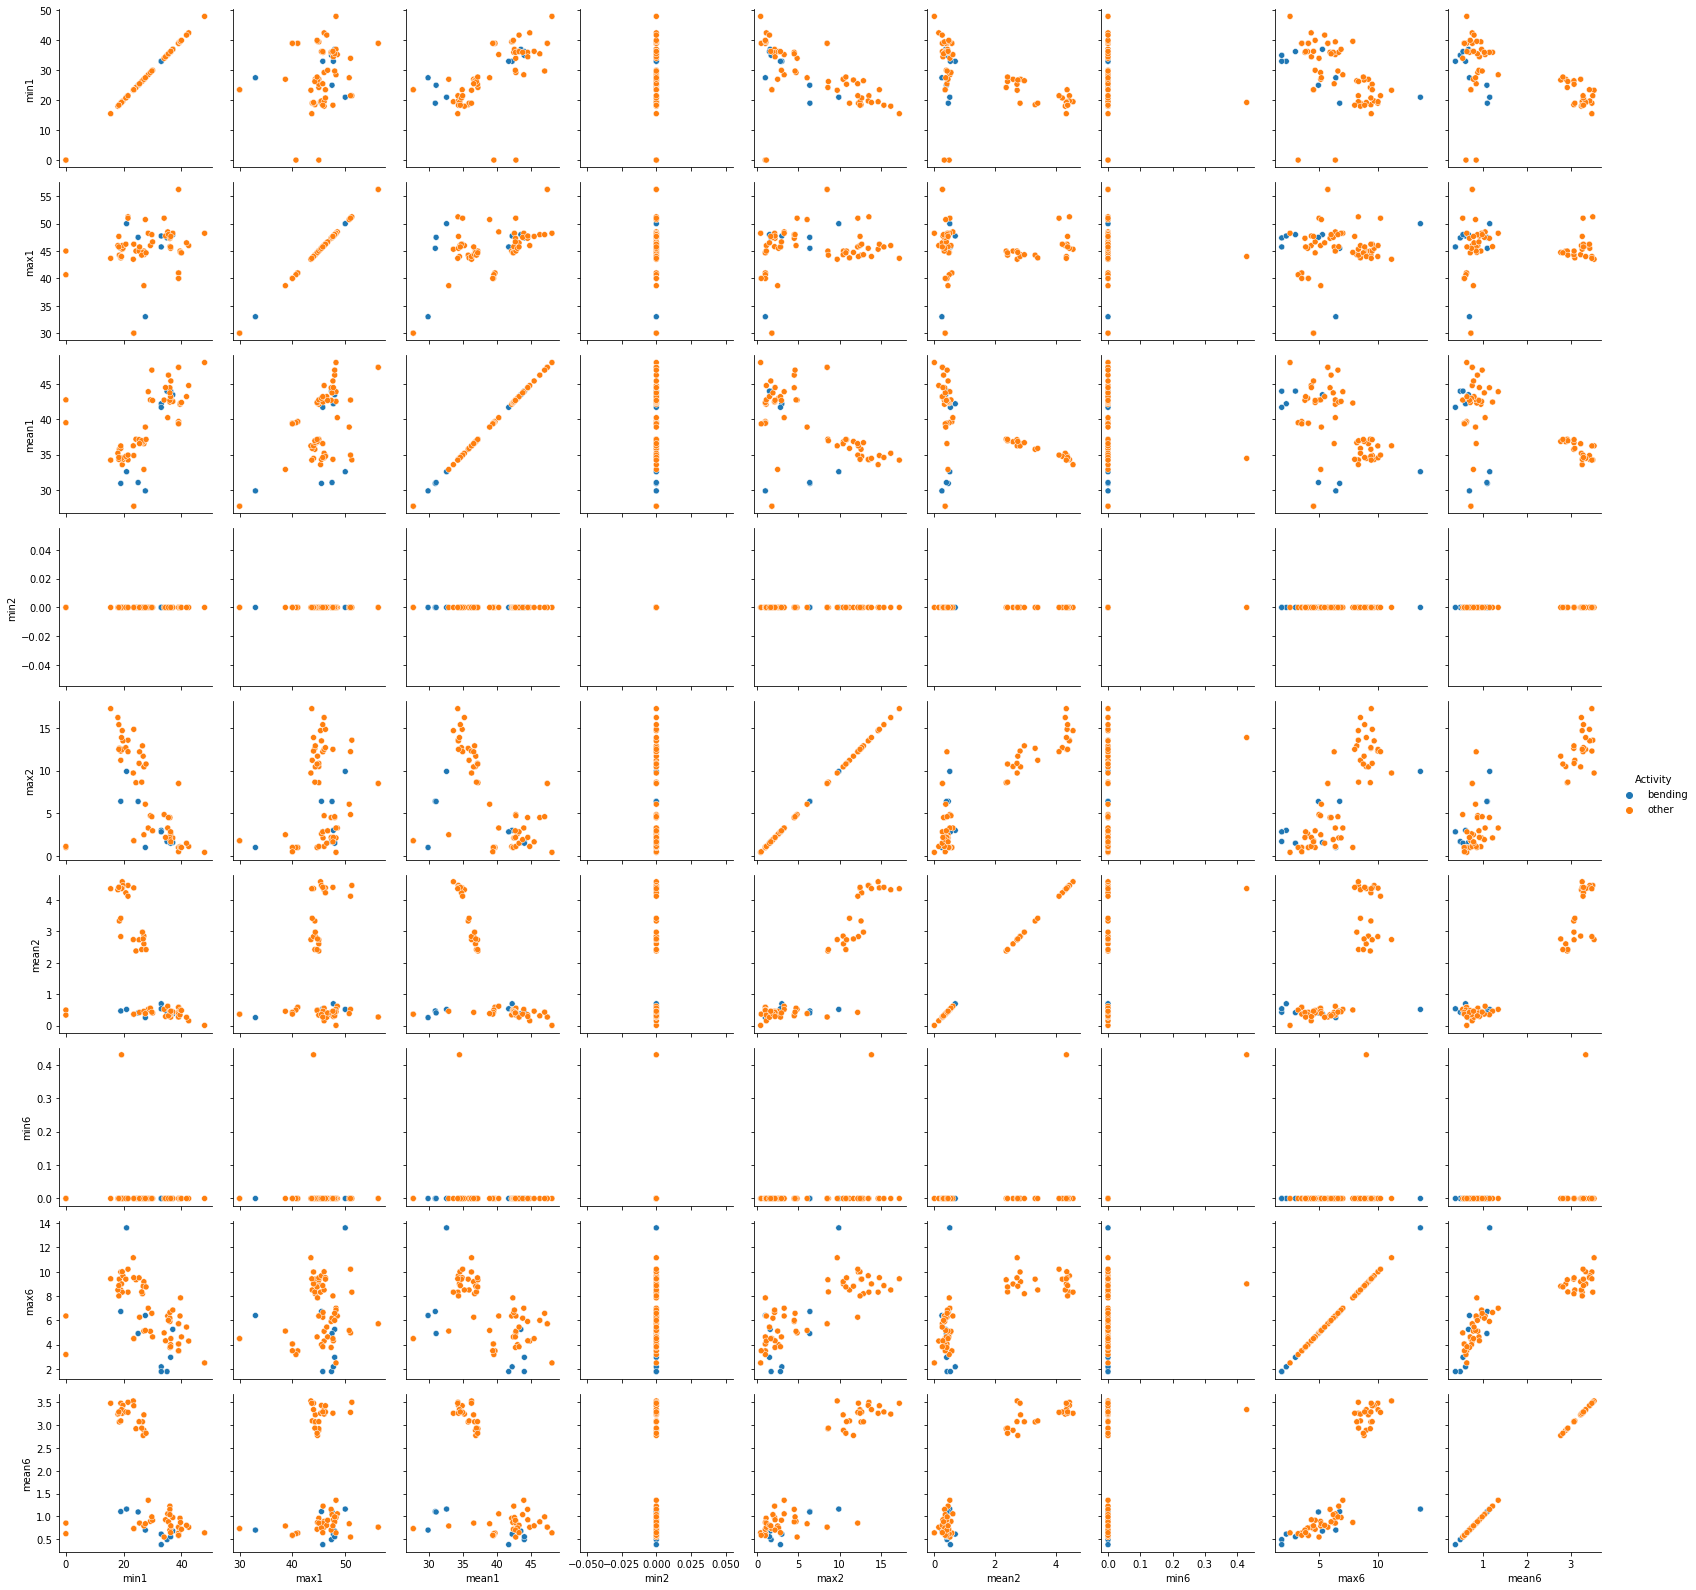

In [19]:
g=sns.PairGrid(train_bin1,hue='Activity')
g.map(sns.scatterplot)
g.add_legend()

<h3>ii. Plotting bending vs other activities after splitting training set into two time series</h3>

### Breaking the time series into two to have 12 features

In [20]:
column_names_12=[]
columns_12=[i for i in columns[1:]]
for i in columns[1:]:
    columns_12.append(i+"_")
for i in range(1,13):
    for feature in ['min','max','mean']:
        column_names_12.append(feature+str(i))
column_names_12.append("Activity")
train_=[]
test_=[]
for activity in activities:
    datasets=os.listdir("../data/"+activity)
    for ds in datasets:
        dataset=pd.read_csv("../data/"+activity+"/"+ds,skiprows=5,names=columns)
        dataset=dataset.drop('time',axis=1)
        part1=dataset[:240]
        part2=dataset[240:]
        part2.reset_index(drop=True,inplace=True)
        res=pd.concat([part1,part2],axis=1)
        res.columns=columns_12        
        column_values=[]
        for column in columns_12:
            desc=res[column].describe()
            values=[desc['min'],desc['max'],desc['mean']]
            column_values+=values
        if activity=="bending1" or activity=="bending2":
            column_values.append("bending")
        else:
            column_values.append("other")
        if ds=="dataset1.csv" or ds=="dataset2.csv":
            test_.append(column_values)
        elif ds=="dataset3.csv":
            if activity!="bending1" and activity!="bending2":
                test_.append(column_values)
            else:
                train_.append(column_values)
        else:
            train_.append(column_values)   
train_
train_data_12=pd.DataFrame(train_,columns=column_names_12)
# # test_data=pd.DataFrame(test,columns=column_names)
# print ("Train data : ")
train_data_12

,min1,max1,mean1,min2,max2,mean2,min3,max3,mean3,min4,...,min10,max10,mean10,min11,max11,mean11,min12,max12,mean12,Activity
0,36.50,46.50,44.057167,0.0,1.50,0.381042,14.25,29.25,23.096792,0.00,...,0.0,4.44,0.501167,29.00,38.25,34.883375,0.00,1.50,0.388333,bending
1,33.75,47.75,43.278875,0.0,3.00,0.673292,11.00,30.00,23.141250,0.00,...,0.0,5.15,1.171792,20.00,38.50,30.965708,0.00,2.18,0.586083,bending
2,33.00,45.75,41.621208,0.0,2.83,0.623083,3.00,28.25,19.081458,0.00,...,0.0,2.35,0.568667,26.00,36.00,29.635833,0.00,1.50,0.347500,bending
3,39.00,48.00,44.117042,0.0,1.30,0.250042,6.25,27.00,17.744167,0.00,...,0.0,5.21,0.575708,8.00,26.00,22.850875,0.00,4.06,0.543875,bending
4,36.67,45.00,43.486208,0.0,1.30,0.378667,4.00,26.33,16.397250,0.00,...,0.0,3.56,0.669750,13.75,26.00,21.882042,0.00,2.96,0.585750,bending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,22.33,46.00,34.966250,0.0,12.68,4.207958,5.00,22.00,15.125750,0.00,...,0.0,9.20,3.143167,6.00,25.25,16.168167,0.00,9.39,3.430208,other
65,21.50,45.67,34.737042,0.0,12.21,4.217333,9.00,22.25,15.595917,0.00,...,0.0,9.09,3.004292,7.33,25.00,16.175167,0.00,10.21,3.225917,other
66,18.33,45.00,33.886458,0.0,12.44,4.332208,8.33,21.75,15.158125,0.00,...,0.0,9.01,3.146667,6.67,24.00,15.829625,0.00,8.01,3.274750,other
67,18.33,44.00,34.836458,0.0,12.38,4.257750,8.00,23.50,15.181958,0.00,...,0.0,9.18,3.159583,7.33,23.00,15.996875,0.47,8.84,3.409458,other


In [21]:
series=[1,2,12]
col_names_12=[]
for i in series:
    for feature in ['min','max','mean'] :
        col_names_12.append(feature+str(i))
col_names_12.append("Activity")
train_bin_12=copy.deepcopy(train_data_12[col_names_12])
print ("Training set for Binary Classifiation with 12 features is : ")
train_bin_12

Training set for Binary Classifiation with 12 features is : 


,min1,max1,mean1,min2,max2,mean2,min12,max12,mean12,Activity
0,36.50,46.50,44.057167,0.0,1.50,0.381042,0.00,1.50,0.388333,bending
1,33.75,47.75,43.278875,0.0,3.00,0.673292,0.00,2.18,0.586083,bending
2,33.00,45.75,41.621208,0.0,2.83,0.623083,0.00,1.50,0.347500,bending
3,39.00,48.00,44.117042,0.0,1.30,0.250042,0.00,4.06,0.543875,bending
4,36.67,45.00,43.486208,0.0,1.30,0.378667,0.00,2.96,0.585750,bending
...,...,...,...,...,...,...,...,...,...,...
64,22.33,46.00,34.966250,0.0,12.68,4.207958,0.00,9.39,3.430208,other
65,21.50,45.67,34.737042,0.0,12.21,4.217333,0.00,10.21,3.225917,other
66,18.33,45.00,33.886458,0.0,12.44,4.332208,0.00,8.01,3.274750,other
67,18.33,44.00,34.836458,0.0,12.38,4.257750,0.47,8.84,3.409458,other


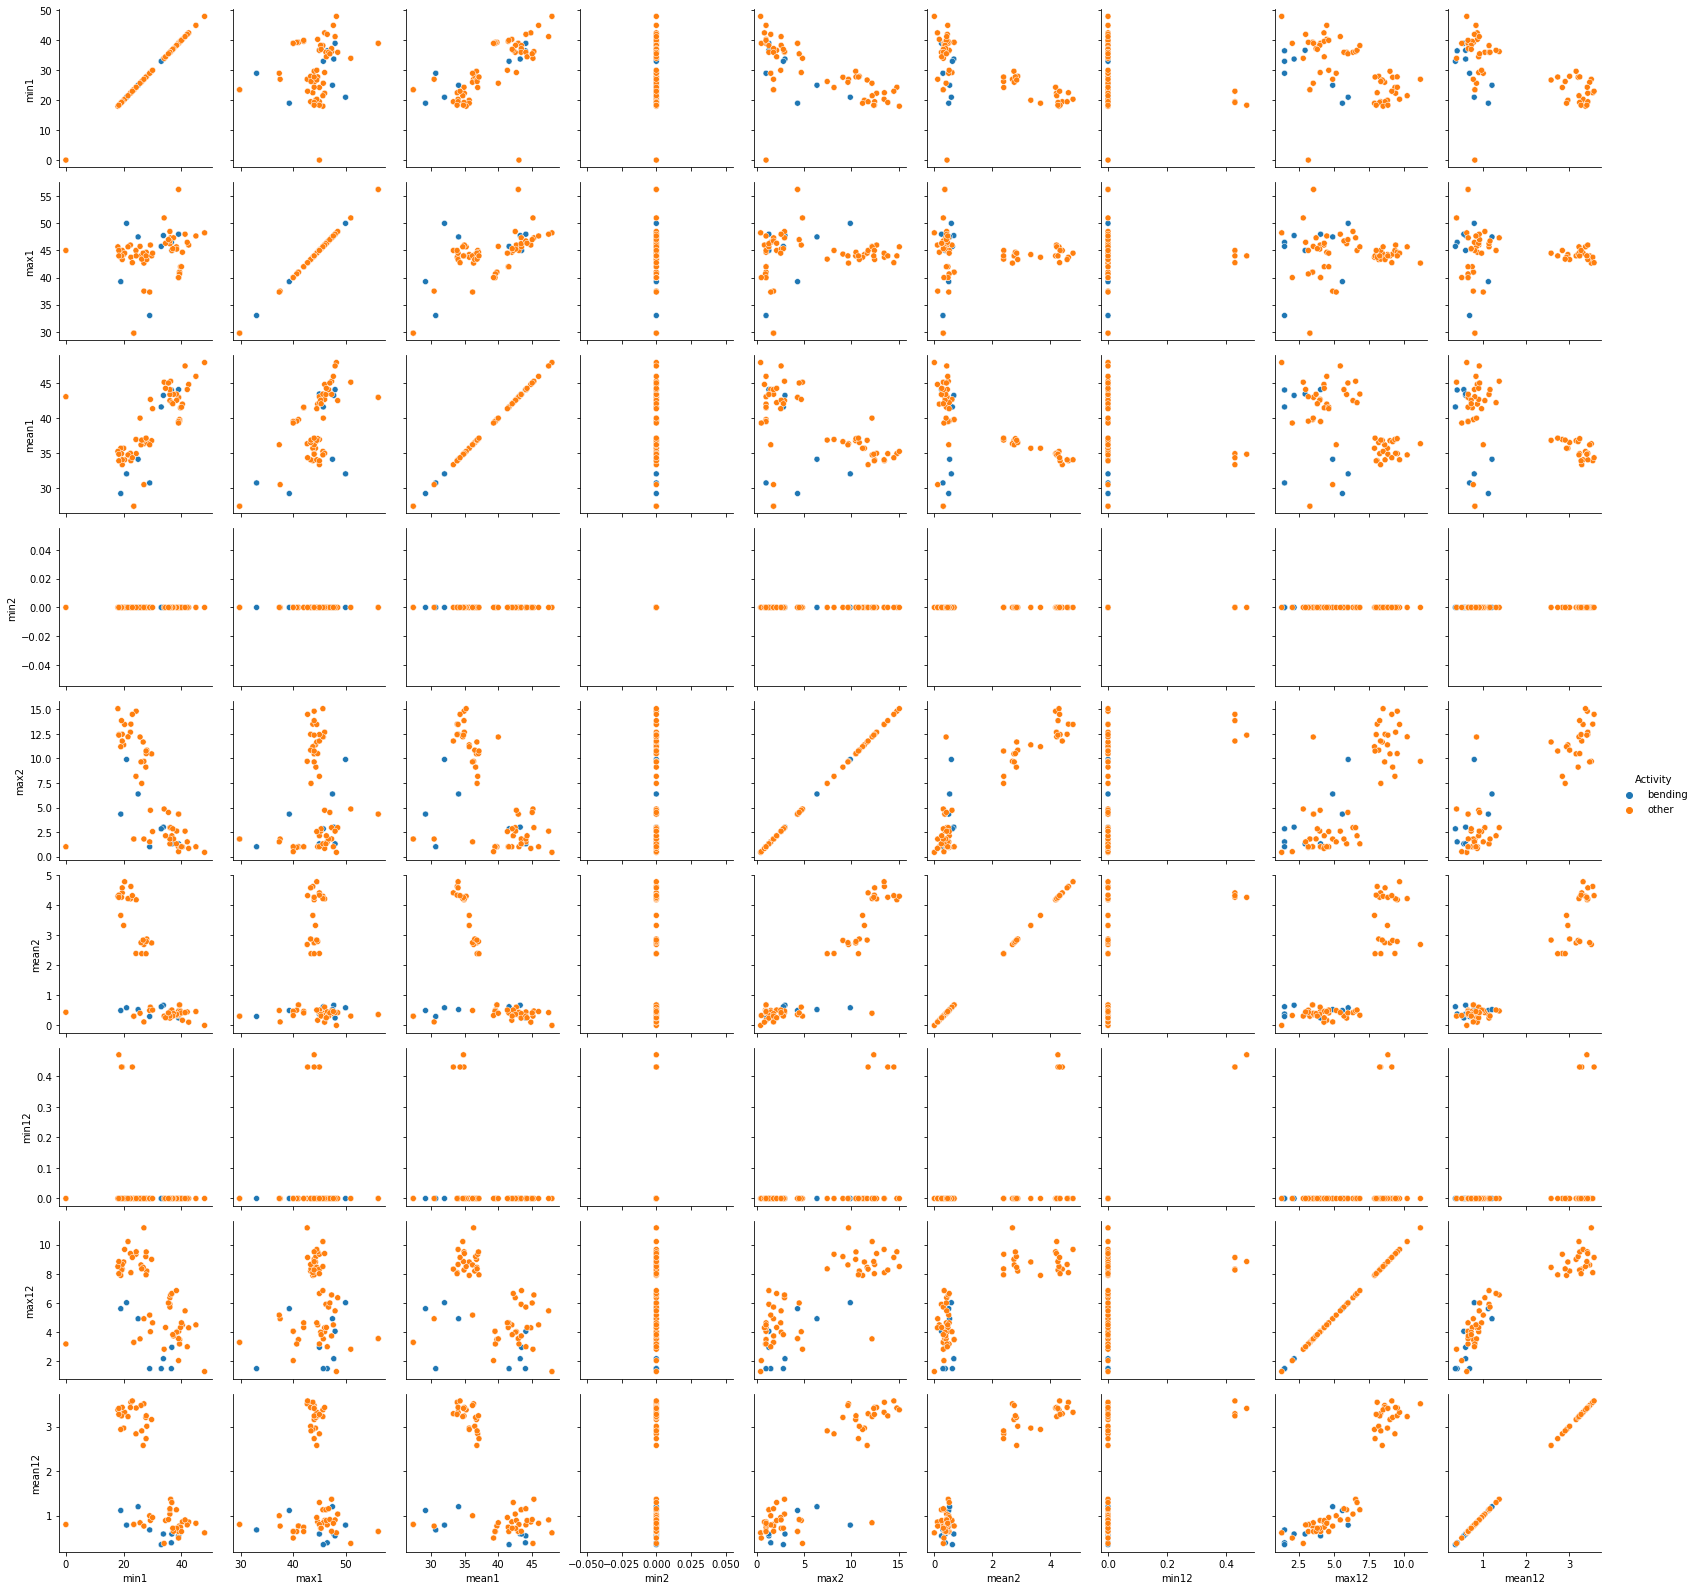

In [22]:
g=sns.PairGrid(train_bin_12,hue='Activity')
g.map(sns.scatterplot)
g.add_legend()

There is not a lot of difference in the plots from the previous two questions.

### iii. Feature Extraction using RFECV and 5-fold cross validation

In [23]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [24]:
agg=['min','max','mean']
all_datasets=[]
accuracy=[]

for l in range(1,21):
    dic={}
    train_=[]
    test_=[]
    for activity in activities:
        datasets=os.listdir("../data/"+activity)
        for ds in datasets:
            dataset=pd.read_csv("../data/"+activity+"/"+ds,skiprows=5,names=columns)
            split=480//l
            dataset=dataset.drop('time',axis=1)
            start=0
            end=split
            column_values=[]
            while (0<=start<end<=480):
                part=dataset[start:end]
                desc=part.describe()
                for i in range(6):
                    for j in agg:
                        column_values.append((desc.loc[j])[i])
                start+=split
                end+=split

            if activity=="bending1" or activity=="bending2":
                column_values.append(1)
            else:
                column_values.append(0)
            if ds=="dataset1.csv" or ds=="dataset2.csv":
                test_.append(column_values)
            elif ds=="dataset3.csv":
                if activity!="bending1" and activity!="bending2":
                    test_.append(column_values)
                else:
                    train_.append(column_values)
            else:
                train_.append(column_values)
    train=pd.DataFrame(train_)
    dic['train']=train
    dic['test']=pd.DataFrame(test_)
    all_datasets.append(dic)
    
    X_train=train.iloc[:,:-1]
    y_train=train.iloc[:,-1]
    
    logistic_regressor=LogisticRegression(solver="newton-cg",C=float('inf'))
    logistic_regressor.fit(X_train,y_train)
    accuracy.append(cross_val_score(logistic_regressor,X_train,y_train,cv=5).mean())
#     accuracy.append(logistic_regressor.score(X_train,y_train))
best_l=(pd.Series(range(20)).loc[np.argmax(accuracy)])+1
print ("Max Accuracy : ",max(accuracy),"\nl : ",best_l)    

Max Accuracy :  0.9857142857142858 
l :  3


### Calculating (l,p) using RFECV and StratifiedKFold

In [25]:
acc=[]
p=[]

for i in range(len(all_datasets)):
#     print (i+1)
    train=all_datasets[i]['train']
    standard_scaler=StandardScaler()
    X_train=train.iloc[:,:-1]
    X_train = standard_scaler.fit_transform(X_train)
    y_train=train.iloc[:,-1]
    logistic_regressor=LogisticRegression(solver="newton-cg",C=float('inf'),n_jobs=-1)
    rfe=RFECV(logistic_regressor, cv=StratifiedKFold(5))
    rfe.fit(X_train,y_train)
#     print (max(rfe.grid_scores_),rfe.n_features_)
#     acc.append((rfe.grid_scores_[rfe.n_features_-1]))
    acc.append(cross_val_score(logistic_regressor,X_train,y_train,cv=5).mean())
    p.append(rfe.n_features_)
best_l_pruned=(pd.Series(range(1,21)).loc[np.argmax(acc)])
best_p_pruned=(pd.Series(p).loc[np.argmax(acc)])
accuracy_pruned=max(acc)
print ("l : ",best_l_pruned,"\np : ",best_p_pruned,"\nAccuracy : ",accuracy_pruned)

l :  1 
p :  5 
Accuracy :  0.9571428571428571


The right way is to find l and p values simultaneously, i.e., p should be found while looping over l.
The wrong way is to find p and then find l later.

### iv. Calculating the confusion matrix, ROC and AUC

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
import statsmodels.api as sm

Pruned X : 
           0         4         8         12        13
0   0.662333 -0.908718  2.074798  4.649718  2.667425
1   0.446854 -0.654335  2.090776  2.964241  2.698848
2   0.446854 -0.687600  1.262294  3.651541  2.482586
3   0.877812 -0.932199  0.424380  0.716938  1.743227
4   0.797008 -0.947854  0.443856  1.340565  1.234917
..       ...       ...       ...       ...       ...
64 -0.872956  1.239841  0.279832  0.342388  0.264508
65 -0.792152  1.147872  0.354282  0.404189  0.172089
66 -1.133686  1.200705  0.364289  0.467862 -0.012751
67 -1.133686  1.766219  0.262790  0.436026 -0.151381
68 -1.438589  2.132139  0.375654  0.295569 -0.012751

[69 rows x 5 columns]

Parameters of Logistic Regression and corresponding p-values : 

Optimization terminated successfully.
         Current function value: 0.388426
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                     18   No. Observations:                   69
Mo

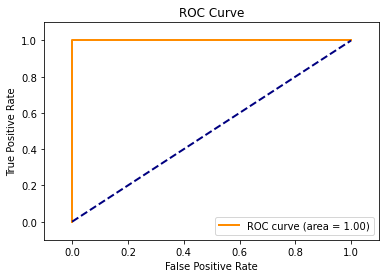


AUC :  1.0


In [27]:
train=all_datasets[best_l_pruned-1]['train']
standard_scaler=StandardScaler()
X_train=train.iloc[:,:-1]
X_train = standard_scaler.fit_transform(X_train)
y_train=train.iloc[:,-1]
logistic_regressor=LogisticRegression(solver="newton-cg",C=float('inf'))
rfe=RFECV(logistic_regressor, cv=StratifiedKFold(5))
rfe.fit(X_train,y_train)
# print (rfe.n_features_)
selected=rfe.ranking_==1
X_pruned=pd.DataFrame(X_train).loc[:,selected]

print ("Pruned X : \n",X_pruned)
logistic_regressor1=LogisticRegression(solver="newton-cg",C=float('inf'))
logistic_regressor1.fit(X_pruned,y_train)
y_predict=logistic_regressor1.predict(X_pruned)
y_score=logistic_regressor1.decision_function(X_pruned)
con_matrix=confusion_matrix(y_train,y_predict)

print ("\nParameters of Logistic Regression and corresponding p-values : \n")
log_model=sm.Logit(y_train,X_pruned).fit()
print (log_model.summary())

print ("\nConfusion Matrix : \n",con_matrix)
fpr,tpr,threshold=roc_curve(y_train,y_score)
area_under_curve=auc(fpr,tpr)

print ("\nROC Curve : \n")
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print ("\nAUC : ",area_under_curve)
# print ("l : ",best_l_pruned,"\np : ",best_p_pruned,"\nAccuracy : ",accuracy_pruned)

From the p-values above we see that features 0 and 8 also can be pruned but RFECV suggests having 5 features.

### v. Testing the classifier with test data

In [28]:
test=all_datasets[best_l_pruned-1]['test']
standard_scaler=StandardScaler()
X_test=test.iloc[:,:-1]

X_test = standard_scaler.fit_transform(X_test)

y_test=test.iloc[:,-1]
# print (y_test)
logistic_regressor=LogisticRegression(solver="newton-cg",C=float('inf'))
rfe=RFECV(logistic_regressor, cv=StratifiedKFold(5))
rfe.fit(X_test,y_test)
# print (rfe.n_features_)
selected_test=rfe.ranking_==1
X_pruned_test=pd.DataFrame(X_test).loc[:,selected_test]
print ("Pruned X test : \n",X_pruned_test)
logistic_regressor_test=LogisticRegression(solver="newton-cg",C=float('inf'))
logistic_regressor_test.fit(X_pruned_test,y_test)
y_predict_test=logistic_regressor_test.predict(X_pruned_test)
accuracy_test=logistic_regressor_test.score(X_pruned_test,y_test)
print ("\nAccuracy of the test data using score function: ",accuracy_test)
print ("\nCross-validation accuracy obtained from train data : ",accuracy_pruned)
print ("\nCross-validation accuracy obtained from test data : ",cross_val_score(logistic_regressor,X_test,y_test).mean())

E:\MS\ML\HW3\env\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Pruned X test : 
           0         7         14        16        17
0   0.825797  1.201446  2.363758 -1.819507 -0.886054
1   0.889289  1.201446  2.184308 -1.331500 -0.885596
2  -1.248275  0.407066  0.854999 -0.568731 -0.767103
3  -2.327638  2.249190  0.035632  0.165331 -0.379845
4  -0.274731  0.677574  0.313070  1.223365  1.271845
5   0.106221  0.281337  0.300748  1.338190  1.128820
6  -0.465207  0.153703  0.106483  0.899393  1.328768
7  -0.338223 -1.894160 -1.258665 -0.761474 -0.735821
8  -0.232403 -1.275039 -1.811103 -1.003427 -0.773910
9   1.735848 -1.941785 -1.358039 -1.581655 -0.821215
10  0.487173 -0.132046 -0.555161 -0.138136 -0.460708
11  0.804633  0.153703  0.150670  0.353973 -0.579488
12  1.439553  0.106078  0.274497  0.755862 -0.641306
13  0.493945 -0.846417 -0.546523 -0.548226 -0.553426
14  0.677649 -0.480659 -0.429123 -0.261163 -0.572719
15  0.444845 -0.417794 -0.252658 -0.257062 -0.636698
16 -0.691238  0.058453 -0.103382  1.387401  1.705413
17 -1.269439  0.106078 -0.11

E:\MS\ML\HW3\env\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


The accuracy is greater than the cross-validation accuracy obtained earlier.

### vi. Do the classes seem to be well seperated to cause instability in calculating parameters

Yes, the classes are well seperated to cause instability in calculating parameters.

In [29]:
con_matrix_test=confusion_matrix(y_test,y_predict_test)
print ("\nConfusion Matrix for test: \n",con_matrix_test)


Confusion Matrix for test: 
 [[15  0]
 [ 0  4]]


### vii. Logistic regression model based on case control sampling

Yes, there are imbalanced classes.

### Using SMOTE to resample the data

In [30]:
from imblearn.over_sampling import SMOTE

Resampled X : 
            0         4         8         12        13
0    0.662333 -0.908718  2.074798  4.649718  2.667425
1    0.446854 -0.654335  2.090776  2.964241  2.698848
2    0.446854 -0.687600  1.262294  3.651541  2.482586
3    0.877812 -0.932199  0.424380  0.716938  1.743227
4    0.797008 -0.947854  0.443856  1.340565  1.234917
..        ...       ...       ...       ...       ...
115 -0.593218  0.457096  0.012324  0.237505  1.782660
116  0.584403 -0.743020  1.558914  2.246972  2.393843
117  0.618096 -0.784792  0.929348  2.485473  2.188800
118 -0.814796 -0.109008  0.150467 -0.317710  2.146541
119  0.446854 -0.661361  1.915773  3.109422  2.653166

[120 rows x 5 columns]
Resampled y : 
 0      1
1      1
2      1
3      1
4      1
      ..
115    1
116    1
117    1
118    1
119    1
Name: 18, Length: 120, dtype: int64

Confusion Matrix for train data: 
 [[60  0]
 [ 0 60]]

Confusion Matrix for test data: 
 [[15  0]
 [ 2  2]]

Parameters of Logistic Regression and corresponding

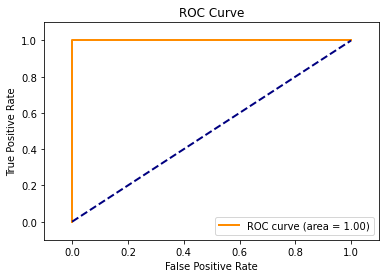


AUC :  1.0


In [31]:
train=all_datasets[best_l_pruned-1]['train']
test=all_datasets[best_l_pruned-1]['test']

standard_scaler=StandardScaler()
X_train=train.iloc[:,:-1]
X_train = standard_scaler.fit_transform(X_train)
y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
X_test = standard_scaler.fit_transform(X_test)
y_test=test.iloc[:,-1]

X_pruned_train=pd.DataFrame(X_train).loc[:,selected]
X_pruned_test=pd.DataFrame(X_test).loc[:,selected]

smote=SMOTE()
X_sm,y_sm=smote.fit_resample(X_pruned_train,y_train)
# X_sm=pd.Dataframe(X_sm)
# y_sm=pd.DataFrame(y_sm)

print ("Resampled X : \n",X_sm)
print ("Resampled y : \n",y_sm)
logistic_regressor=LogisticRegression(solver="newton-cg",C=float('inf'))
logistic_regressor.fit(X_sm,y_sm)
y_predict_sm_train=logistic_regressor.predict(X_sm)
con_matrix_sm_train=confusion_matrix(y_sm,y_predict_sm_train)
print ("\nConfusion Matrix for train data: \n",con_matrix_sm_train)
y_predict_test=logistic_regressor.predict(X_pruned_test)
con_matrix_sm_test=confusion_matrix(y_test,y_predict_test)
print ("\nConfusion Matrix for test data: \n",con_matrix_sm_test)

y_score_sm=logistic_regressor.decision_function(X_sm)
print ("\nParameters of Logistic Regression and corresponding p-values : \n")
log_model=sm.Logit(y_sm,X_sm).fit()
print (log_model.summary())


fpr,tpr,threshold=roc_curve(y_sm,y_score_sm)
area_under_curve=auc(fpr,tpr)

print ("\nROC Curve : \n")
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print ("\nAUC : ",area_under_curve)

### (e) Binary Classification Using L1-penalized logistic regression

### i. Performing L1-penalized logistic regression

In [32]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import MinMaxScaler

In [33]:
C=[]
acc_cv=[]
for i in range(len(all_datasets)):
#     print (i+1)
#     print (all_datasets[i])
    train=all_datasets[i]['train']
    standard_scaler=StandardScaler()
    min_max_scaler=MinMaxScaler()
    X_train=train.iloc[:,:-1]
    X_train = standard_scaler.fit_transform(X_train)
    y_train=train.iloc[:,-1]
    logistic_regressor_cv=LogisticRegressionCV(Cs=10,cv=5,penalty='l1',solver='liblinear')
    logistic_regressor_cv.fit(X_train,y_train)
#     acc_cv.append(logistic_regressor_cv.score(X_train,y_train))
    acc_cv.append(cross_val_score(logistic_regressor_cv,X_train,y_train,cv=5).mean())
    C.append(logistic_regressor_cv.C_)
#     print (cross_val_score(logistic_regressor_cv,X_train,y_train,cv=StratifiedKFold(5)).mean(),logistic_regressor_cv.C_)
best_l_cv=(pd.Series(range(1,21)).loc[np.argmax(acc_cv)])
best_C_cv=(pd.Series(C).loc[np.argmax(acc_cv)])
accuracy_cv=max(acc_cv)
print ("l : ",best_l_cv,"\nC : ",best_C_cv,"\nAccuracy : ",accuracy_cv)

l :  1 
C :  [0.35938137] 
Accuracy :  0.9714285714285715


### ii. Comparing L1-penalised vs variable selection with p-values

The accuracy for L1- penalised is more and it is easier to implement.

### (f) Multi-class Classification

### i. L1 penalised multinomial regression

### Preparing data

In [34]:
agg=['min','max','mean']
classes={'bending1':1,'bending2':1}
for i in range(2,len(activities)):
    classes[activities[i]]=i

all_datasets_multi=[]

for l in range(1,21):
#     print (l)
    dic={}
    train_=[]
    test_=[]
    for activity in activities:
        datasets=os.listdir("../data/"+activity)
        for ds in datasets:
            dataset=pd.read_csv("../data/"+activity+"/"+ds,skiprows=5,names=columns)
            split=480//l
            dataset=dataset.drop('time',axis=1)
            start=0
            end=split
            column_values=[]
            while (0<=start<end<=480):
                part=dataset[start:end]
                desc=part.describe()
                for i in range(6):
                    for j in agg:
                        column_values.append((desc.loc[j])[i])
                start+=split
                end+=split
            
            column_values.append(classes[activity])

            if ds=="dataset1.csv" or ds=="dataset2.csv":
                test_.append(column_values)
            elif ds=="dataset3.csv":
                if activity!="bending1" and activity!="bending2":
                    test_.append(column_values)
                else:
                    train_.append(column_values)
            else:
                train_.append(column_values)
    train=pd.DataFrame(train_)
    dic['train']=train
    dic['test']=pd.DataFrame(test_)
    all_datasets_multi.append(dic) 
# all_datasets_multi

In [35]:
C_multi=[]
acc_multi=[]
for i in range(len(all_datasets)):
#     print (i+1)
#     print (all_datasets[i])
    train=all_datasets_multi[i]['train']
    standard_scaler=StandardScaler()
    X_train=train.iloc[:,:-1]
    X_train = standard_scaler.fit_transform(X_train)
    y_train=train.iloc[:,-1]
    logistic_regressor_multi=LogisticRegressionCV(penalty='l1',solver='saga',n_jobs=-1,max_iter=7000)
    logistic_regressor_multi.fit(X_train,y_train)
    acc_multi.append(logistic_regressor_multi.score(X_train,y_train))
#     acc_multi.append(cross_val_score(logistic_regressor_multi,X_train,y_train,cv=5).mean())
    C_multi.append(logistic_regressor_multi.C_)
    #     print (cross_val_score(logistic_regressor_cv,X_train,y_train,cv=StratifiedKFold(5)).mean(),logistic_regressor_cv.C_)
best_l_multi=(pd.Series(range(1,21)).loc[np.argmax(acc_multi)])
best_C_multi=(pd.Series(C_multi).loc[np.argmax(acc_multi)])
accuracy_multi=max(acc_multi)
print ("l : ",best_l_multi,"\nC : ",best_C_multi,"\nAccuracy : ",accuracy_multi)

l :  2 
C :  [166.81005372 166.81005372 166.81005372 166.81005372 166.81005372
 166.81005372] 
Accuracy :  1.0


### Fitting a model to find the Confusion matrix, ROC and AUC

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
train=all_datasets_multi[best_l_multi-1]['train']
test=all_datasets_multi[best_l_multi-1]['test']
standard_scaler=StandardScaler()
X_train=train.iloc[:,:-1]
X_train = standard_scaler.fit_transform(X_train)
y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
X_test = standard_scaler.fit_transform(X_test)
y_test=test.iloc[:,-1]
logistic_regressor_multi=LogisticRegressionCV(Cs=10,penalty='l1',solver='saga',n_jobs=-1,max_iter=7000)
logistic_regressor_multi.fit(X_train,y_train)
print ("Test Error : ",(1-logistic_regressor_multi.score(X_test,y_test)))
#     acc_multi.append(cross_val_score(logistic_regressor_multi,X_train,y_train,cv=5).mean())
print ("C : ",logistic_regressor_multi.C_)
y_predict_multi=logistic_regressor_multi.predict(X_test)
con_matrix=confusion_matrix(y_test,y_predict_multi)
print ("\nConfusion Matrix for test data: \n",con_matrix)

Test Error :  0.1578947368421053
C :  [166.81005372 166.81005372 166.81005372 166.81005372 166.81005372
 166.81005372]

Confusion Matrix for test data: 
 [[3 0 0 1 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 2 1 0]
 [0 0 1 0 2 0]
 [0 0 0 0 0 3]]


### ii. Naive Bayes' Classification using Gaussian and Multinomial priors

### Gaussian Naive Bayes'

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
acc_gauss=[]
for i in range(len(all_datasets)):
#     print (i+1)
    train=all_datasets_multi[i]['train']
#     standard_scaler=StandardScaler()
    min_max_scaler=MinMaxScaler()
    X_train=train.iloc[:,:-1]
    X_train = min_max_scaler.fit_transform(X_train)
#     print (X_train)
    y_train=train.iloc[:,-1]
    nb_gauss=GaussianNB()
    nb_gauss.fit(X_train,y_train)
    acc_gauss.append(nb_gauss.score(X_train,y_train))
#     print (nb_gauss.score(X_train,y_train))
best_l_gauss=(pd.Series(range(1,21)).loc[np.argmax(acc_gauss)])
accuracy_gauss=max(acc_gauss)
print ("l : ",best_l_gauss,"\nAccuracy : ",accuracy_gauss)

l :  19 
Accuracy :  1.0


In [40]:
train=all_datasets_multi[best_l_gauss-1]['train']
test=all_datasets_multi[best_l_gauss-1]['test']
min_max_scaler=MinMaxScaler()
X_train=train.iloc[:,:-1]
X_train = min_max_scaler.fit_transform(X_train)
y_train=train.iloc[:,-1]
scaler=MinMaxScaler()
X_test=test.iloc[:,:-1]
X_test = scaler.fit_transform(X_test)
y_test=test.iloc[:,-1]
nb_gauss=GaussianNB()
nb_gauss.fit(X_train,y_train)
print("Train Error : ",1-(nb_gauss.score(X_train,y_train)))
print("Test Error : ",1-(nb_gauss.score(X_test,y_test)))
y_predict_gauss=nb_gauss.predict(X_test)
con_matrix=confusion_matrix(y_test,y_predict_gauss)
print ("\nConfusion Matrix for test data: \n",con_matrix)

Train Error :  0.0
Test Error :  0.5263157894736843

Confusion Matrix for test data: 
 [[0 0 2 1 1 0]
 [0 3 0 0 0 0]
 [1 0 2 0 0 0]
 [0 2 0 1 0 0]
 [0 2 0 1 0 0]
 [0 0 0 0 0 3]]


### Multinomial Naive Bayes'

In [41]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
acc_multinomial=[]
for i in range(len(all_datasets)):
#     print (i+1)
    train=all_datasets_multi[i]['train']
#     standard_scaler=StandardScaler()
    min_max_scaler=MinMaxScaler()
    X_train=train.iloc[:,:-1]
    X_train = min_max_scaler.fit_transform(X_train)
#     print (X_train)
    y_train=train.iloc[:,-1]
    nb_multinomial=MultinomialNB()
    nb_multinomial.fit(X_train,y_train)
    acc_multinomial.append(nb_multinomial.score(X_train,y_train))
#     print (nb_multinomial.score(X_train,y_train))
best_l_multinomial=(pd.Series(range(1,21)).loc[np.argmax(acc_multinomial)])
accuracy_multinomial=max(acc_multinomial)
print ("l : ",best_l_multinomial,"\nAccuracy : ",accuracy_multinomial)

l :  5 
Accuracy :  0.8840579710144928


In [43]:
train=all_datasets_multi[best_l_multinomial-1]['train']
test=all_datasets_multi[best_l_multinomial-1]['test']
min_max_scaler=MinMaxScaler()
X_train=train.iloc[:,:-1]
X_train = min_max_scaler.fit_transform(X_train)
y_train=train.iloc[:,-1]
scaler=MinMaxScaler()
X_test=test.iloc[:,:-1]
X_test = scaler.fit_transform(X_test)
y_test=test.iloc[:,-1]
nb_multinomial=MultinomialNB()
nb_multinomial.fit(X_train,y_train)
print("Train Error : ",1-(nb_multinomial.score(X_train,y_train)))
print("Test Error : ",1-(nb_multinomial.score(X_test,y_test)))
y_predict_multinomial=nb_multinomial.predict(X_test)
con_matrix=confusion_matrix(y_test,y_predict_multinomial)
print ("\nConfusion Matrix for test data: \n",con_matrix)

Train Error :  0.1159420289855072
Test Error :  0.1578947368421053

Confusion Matrix for test data: 
 [[4 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 2 1 0 0]
 [0 0 0 2 1 0]
 [0 0 1 0 2 0]
 [0 0 0 0 0 3]]


### Comparing the results

Multinomial is better than Gaussian Naive Bayes' because the test error is significantly less 

### iii. Best Method for multi-class clssification

Mutinomial Naive Bayes' is the best because it has the least test error which mean more accuracy.

### 2. ISLR 3.7.4

 (a) The cubic model has more features compared to the linear model, which mean that it is more flexible to fit the data, hence resulting in a lower RSS.

(b) Since the data has a linear relationship, the cubic model would have overfit the training data. Therefore it would not fit the test data correctly leading to a larger test RSS. The linear model would fit the test data with a smaller RSS. 

(c) The training RSS would still be lower for the cubic model because the relationship is non-linear, but it depends on the data.

(d) The training RSS would still be less considering the non-linearity of the data, but we cannot be sure. Therefore it depends on the data.

### 3. ISLR 4.7.3

PDF of the proof is in the assignment folder. There is an quadratic term in the equation proved and therefor Naive Bayes' is quadratic.

### 4. ISLR 4.7.7

PDF of the proof is in the assignment folder